In [1]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC

In [2]:
dir = 'D:\\PRODIGY\\task_3\\cats_vs_dogs\\dogs_vs_cats\\train'

In [3]:
categories = ['cats', 'dogs']

data = []

for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        pet_img = cv2.imread(imgpath, 0)
        try:
            pet_img = cv2.resize(pet_img, (50, 50), interpolation = cv2.INTER_AREA)
            image = np.array(pet_img).flatten()
            data.append([image, label])
        except Exception as e:
            pass

print(len(data))

20000


In [4]:
def process_images(folder):

    categories = ['cats','dogs']
    
    flat_data_arr = [] 
    target_arr = []
    datadir = folder
   
    for category in categories:

        print(f'loading... category : {category}')
        path = os.path.join(datadir, category)
        for img in os.listdir(path):

            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array,(150, 150))
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(categories.index(category))

        print(f'loaded category:{category} successfully')
    flat_data = np.array(flat_data_arr)
    target = np.array(target_arr)
    return flat_data, target

In [5]:
x_train, y_train = process_images('cats_vs_dogs/dogs_vs_cats/train')

loading... category : cats
loaded category:cats successfully
loading... category : dogs
loaded category:dogs successfully


In [6]:
np.unique(y_train)

array([0, 1])

In [7]:
x_test, y_test = process_images('cats_vs_dogs/dogs_vs_cats/test')

loading... category : cats
loaded category:cats successfully
loading... category : dogs
loaded category:dogs successfully


In [8]:
x_selected_train = np.concatenate((x_train[:1000], x_train[-1000:]))
y_selected_train = np.concatenate((y_train[:1000], y_train[-1000:]))
x_selected_train.shape, y_selected_train.shape

((2000, 67500), (2000,))

In [9]:
x_selected_test = np.concatenate((x_test[:200], x_test[-200:]))
y_selected_test = np.concatenate((y_test[:200], y_test[-200:]))
x_selected_test.shape, y_selected_test.shape

((400, 67500), (400,))

In [10]:
sc = StandardScaler()

In [11]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss = 'hinge')

In [12]:
x_sc_train = sc.fit_transform(x_selected_train)
x_sc_test = sc.transform(x_selected_test)

In [13]:
model.fit(x_sc_train, y_selected_train)

SGDClassifier()

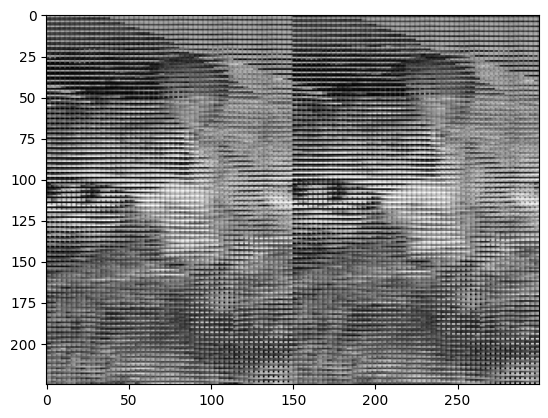

The predicted pet is :  cats
Accuracy = 82.50 %


In [21]:
prediction = model.predict(x_sc_test)
accuracy = model.score(x_selected_test, prediction)

categories = ['cats', 'dogs']

pet = x_selected_test[0].reshape(225, 300)
plt.imshow(pet, cmap = 'gray')
plt.show()

print('The predicted pet is : ', categories[prediction[0]])

print(f"Accuracy = {accuracy*100:.2f} %")